In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import minimize
from dotenv import load_dotenv

In [2]:
# Getting environment variables
load_dotenv('.env')
file_path = os.getenv('StockDataFiles')

In [3]:
# Get all stock data files

stock_files = [f for f in os.listdir(file_path) if f.endswith('.csv')]
stock_files

['Amazon.csv',
 'Apple.csv',
 'Cisco.csv',
 'HDFC.csv',
 'Infosys.csv',
 'Microsoft.csv',
 'Nestle.csv',
 'Netflix.csv',
 'Reliance.csv',
 'Starbucks.csv']

In [4]:
# Assigning a color to each stock, for plotting (if required)

colors = {
'Amazon': 'red',
 'Apple': 'blue',
 'Cisco' : 'green',
 'HDFC' : 'yellow',
 'Infosys' : 'black',
 'Microsoft' : 'orange',
 'Netflix' : 'purple',
 'Netflix_data' : 'brown',
 'Reliance' : 'pink',
 'Starbucks' : 'cyan'
}

In [5]:
# Convert all stock files to dataframes.
# Clean the dataframes by removing the $ sign from the columns and converting them to float.
# Add a column for the stock name.
# Calculate the daily returns for each stock.
# Concatenate all the dataframes into a single dataframe.

dfs = []

for file in stock_files:
    
    df = pd.read_csv(f"{file_path}/{file}")

    # Remove the $ sign from the columns and convert them to float
    df['Close/Last'] = df['Close/Last'].str.replace('$', '')
    df['Close/Last'] = df['Close/Last'].astype(float)

    df['Open'] = df['Open'].str.replace('$', '')
    df['Open'] = df['Open'].astype(float)

    df['High'] = df['High'].str.replace('$', '')
    df['High'] = df['High'].astype(float)
    df['High'] = round(df['High'], 2)
    
    df['Low'] = df['Low'].str.replace('$', '')
    df['Low'] = df['Low'].astype(float)

    df['Volume'] = df['Volume'].fillna(0).astype(int)
    df['Volume'] = df['Volume'].astype(int)

    df['Stock_name'] = file.split('.')[0]

    df['Returns'] = df['Close/Last'].pct_change()

    dfs.append(df)

all_data_0 = pd.concat(dfs, ignore_index=True)
all_data_0.head()

C:\Users\NILADRI\AppData\Local\Temp\ipykernel_5812\2093020217.py:32: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df['Returns'] = df['Close/Last'].pct_change()


,Date,Close/Last,Volume,Open,High,Low,Stock_name,Returns
0,02/14/2025,228.68,27031080,229.200,229.89,227.23,Amazon,NaN
1,02/13/2025,230.37,31346510,228.850,230.42,227.52,Amazon,0.007390
2,02-12-2025,228.93,32285250,230.460,231.18,228.16,Amazon,-0.006251
3,02-11-2025,232.76,23713730,231.920,233.44,230.13,Amazon,0.016730
4,02-10-2025,233.14,35419930,230.545,233.92,229.20,Amazon,0.001633


In [6]:
# Convert the date column to datetime format
# Drop rows with missing/invalid date values

all_data_0['Date'] = pd.to_datetime(all_data_0['Date'], errors='coerce')
all_data_0 = all_data_0.dropna(subset=['Date'])
all_data_0

,Date,Close/Last,Volume,Open,High,Low,Stock_name,Returns
0,2025-02-14,228.68,27031080,229.200,229.89,227.2300,Amazon,NaN
1,2025-02-13,230.37,31346510,228.850,230.42,227.5200,Amazon,0.007390
10,2025-01-31,237.68,36162380,236.500,240.29,236.4100,Amazon,0.001095
11,2025-01-30,234.64,32020730,237.140,237.95,232.2200,Amazon,-0.012790
12,2025-01-29,237.07,26091720,239.015,240.39,236.1500,Amazon,0.010356
...,...,...,...,...,...,...,...,...
6588,2023-02-17,107.10,6876408,106.735,107.46,106.2300,Starbucks,0.022142
6589,2023-02-16,107.54,4596815,107.755,109.10,107.4100,Starbucks,0.004108
6590,2023-02-15,109.00,4060391,107.500,109.00,107.2613,Starbucks,0.013576
6591,2023-02-14,107.98,5109387,107.930,108.47,106.6950,Starbucks,-0.009358


In [7]:
# Drop rows with missing/invalid returns values

all_data_0.dropna(subset=['Returns'], inplace=True)
all_data_0.head()

,Date,Close/Last,Volume,Open,High,Low,Stock_name,Returns
1,2025-02-13,230.37,31346510,228.850,230.42,227.52,Amazon,0.007390
10,2025-01-31,237.68,36162380,236.500,240.29,236.41,Amazon,0.001095
11,2025-01-30,234.64,32020730,237.140,237.95,232.22,Amazon,-0.012790
12,2025-01-29,237.07,26091720,239.015,240.39,236.15,Amazon,0.010356
13,2025-01-28,238.15,41587190,234.290,241.77,233.98,Amazon,0.004556


In [8]:
all_data = all_data_0.copy(deep = True)

In [9]:
all_data.dtypes

Date          datetime64[ns]
Close/Last           float64
Volume                 int64
Open                 float64
High                 float64
Low                  float64
Stock_name            object
Returns              float64
dtype: object

In [10]:
all_data['Stock_name'].unique()

array(['Amazon', 'Apple', 'Cisco', 'HDFC', 'Infosys', 'Microsoft',
       'Nestle', 'Netflix', 'Reliance', 'Starbucks'], dtype=object)

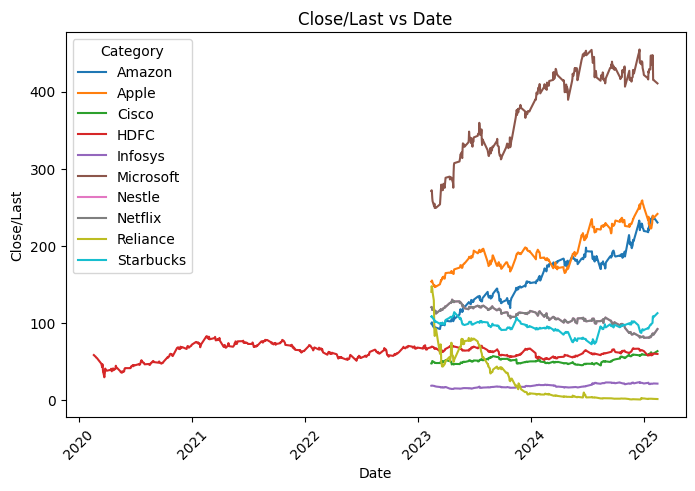

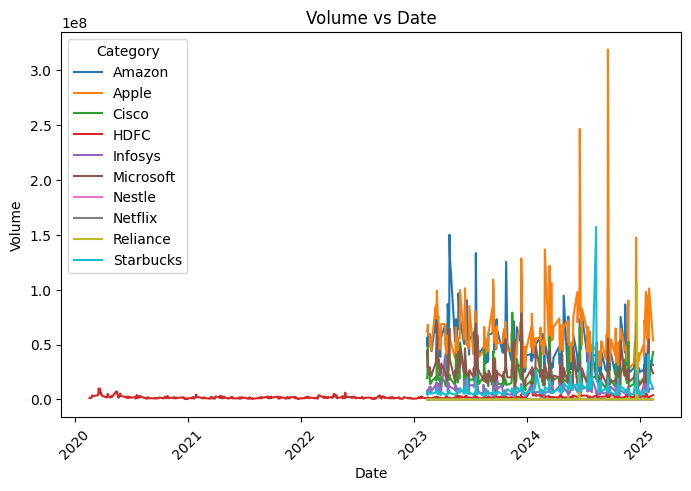

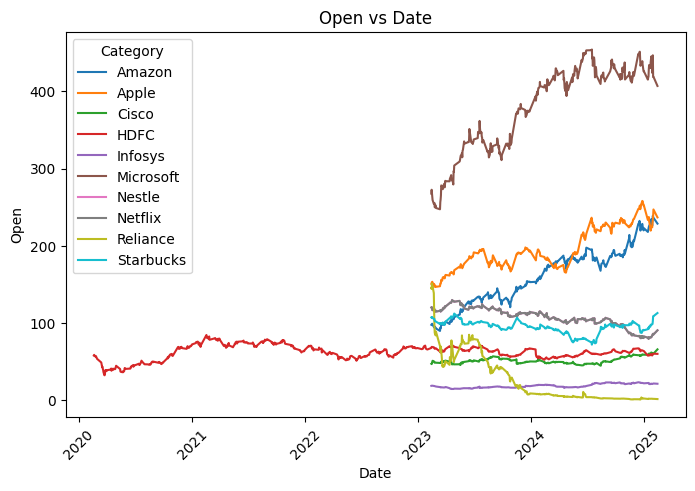

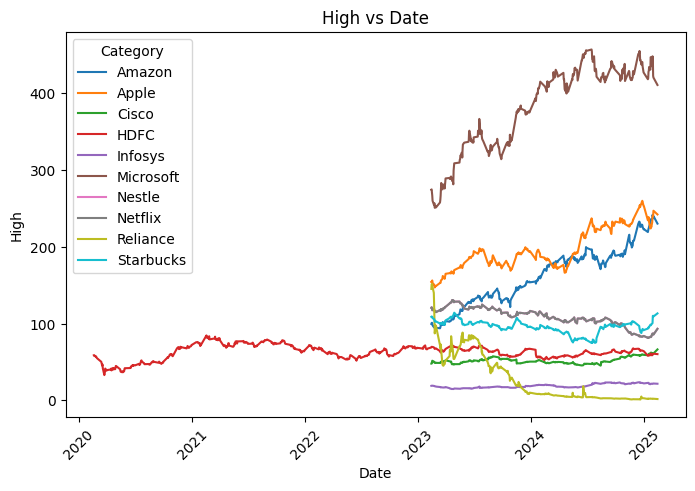

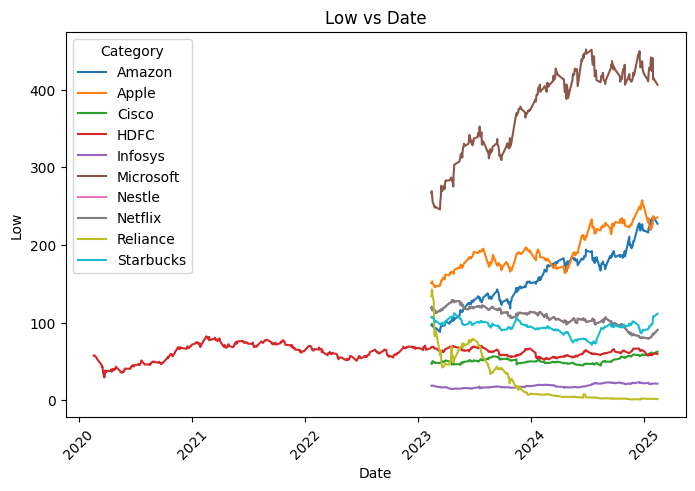

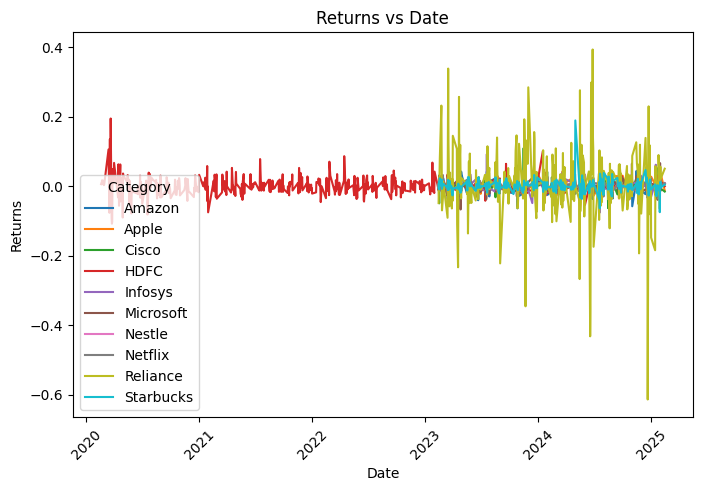

In [11]:
for i in ['Close/Last', 'Volume','Open','High', 'Low', 'Returns']:
    plt.figure(figsize=(8, 5))
    sns.lineplot(data=all_data, x="Date", y=i, hue="Stock_name" )

    plt.title(f"{i} vs Date")
    plt.xlabel("Date")
    plt.ylabel(i)
    plt.xticks(rotation=45)
    plt.legend(title="Category")
    plt.show()

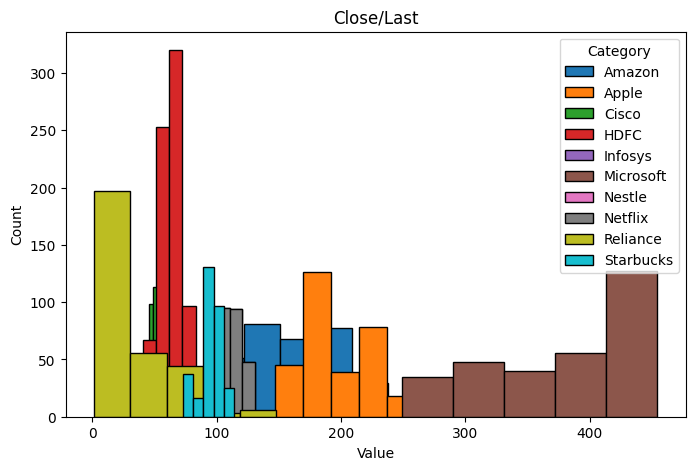

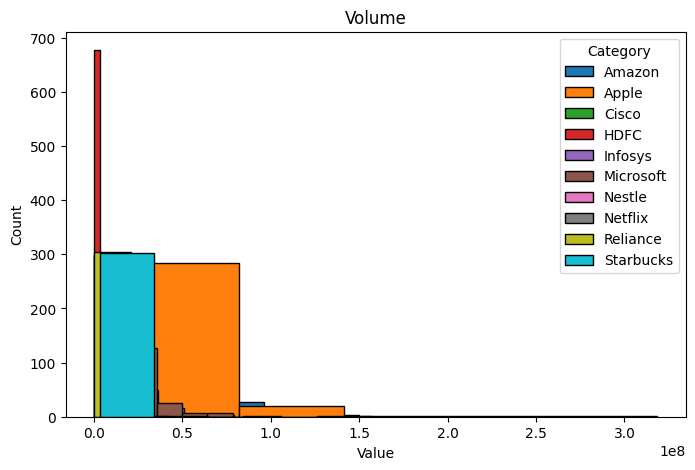

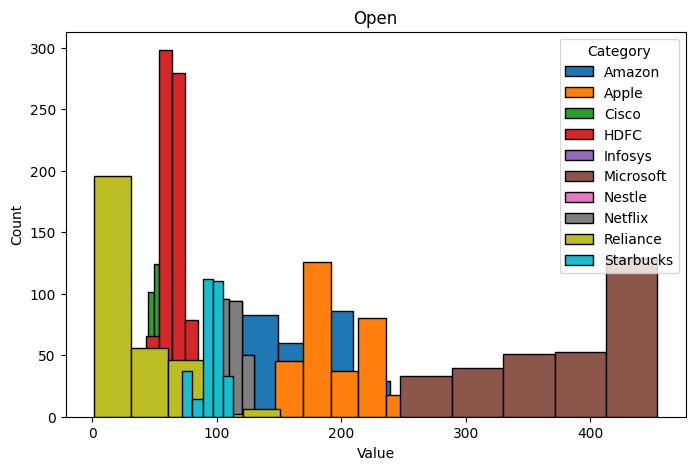

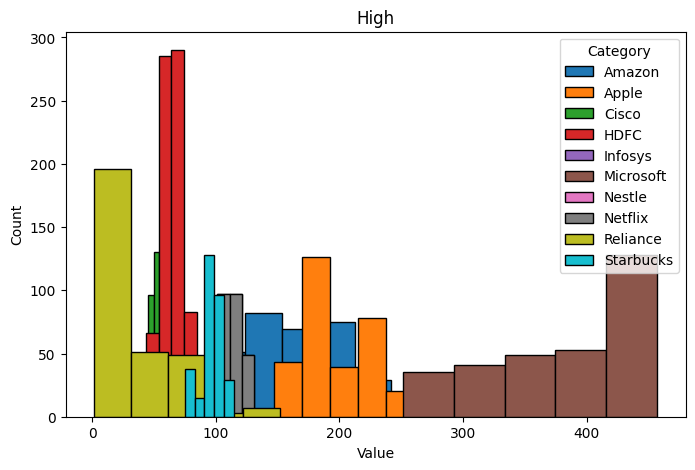

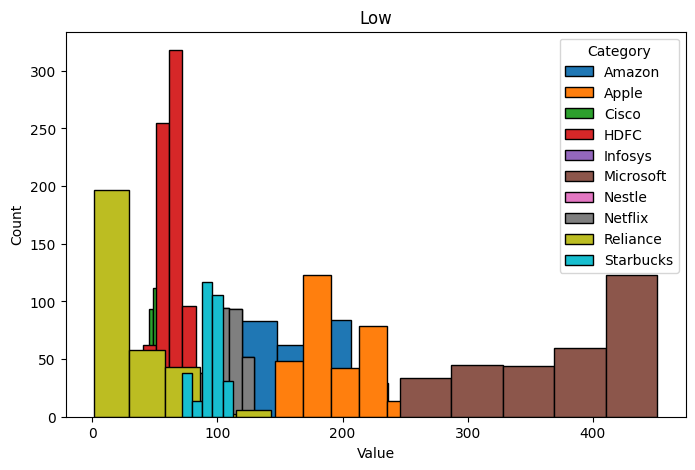

In [12]:
for i in ['Close/Last', 'Volume','Open','High', 'Low']:

    # Create a histogram for each category
    plt.figure(figsize=(8, 5))

    for category, group in all_data.groupby("Stock_name"):
        plt.hist(group[i], bins=5, alpha=1, label=category, edgecolor='black')

    plt.title(i)
    plt.xlabel("Value")
    plt.ylabel("Count")
    plt.legend(title="Category")
    plt.show()

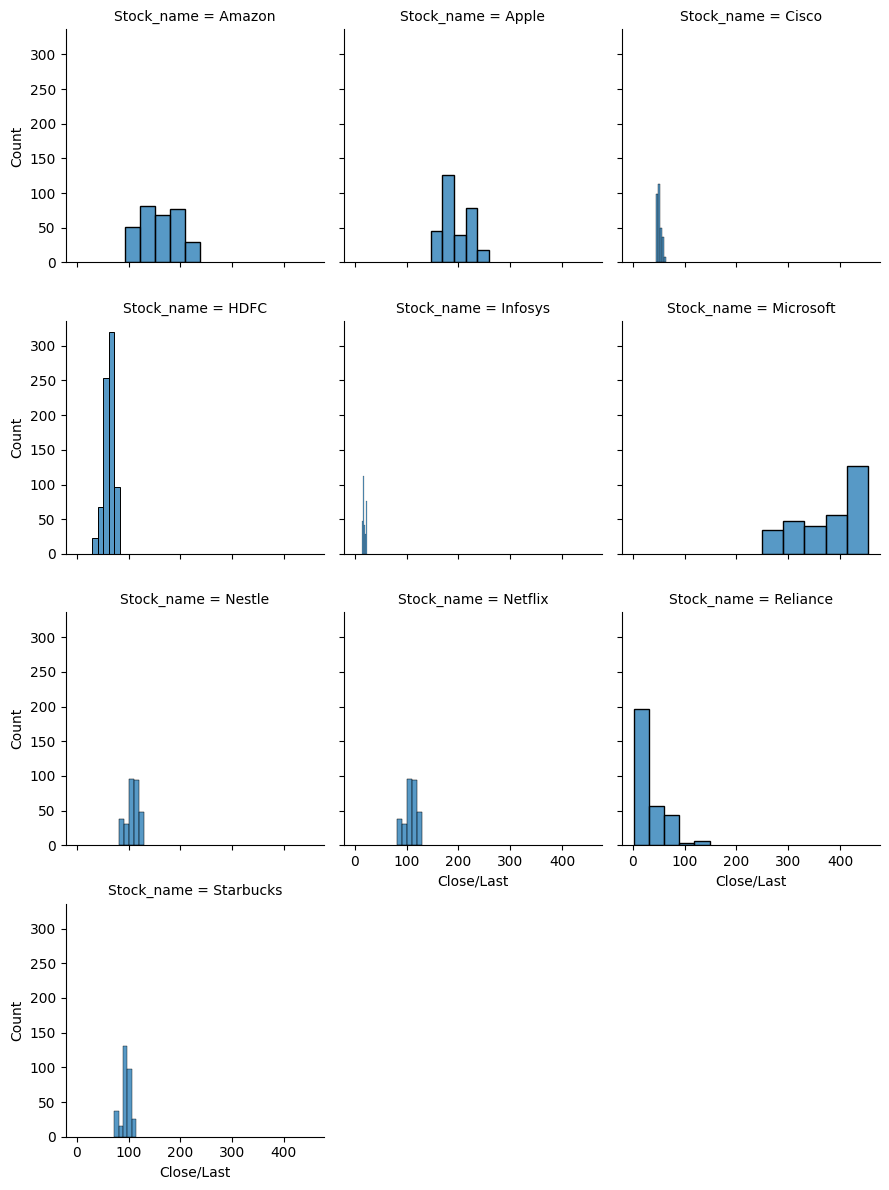

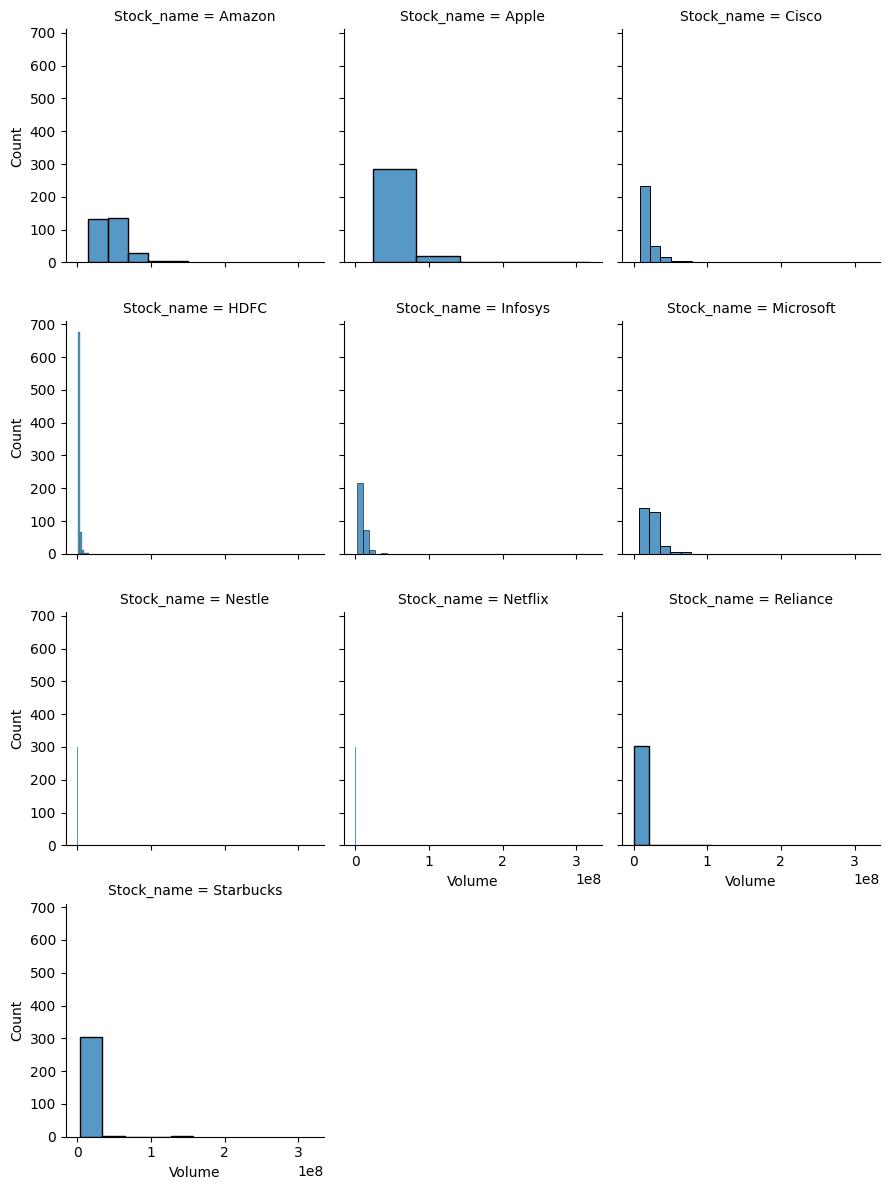

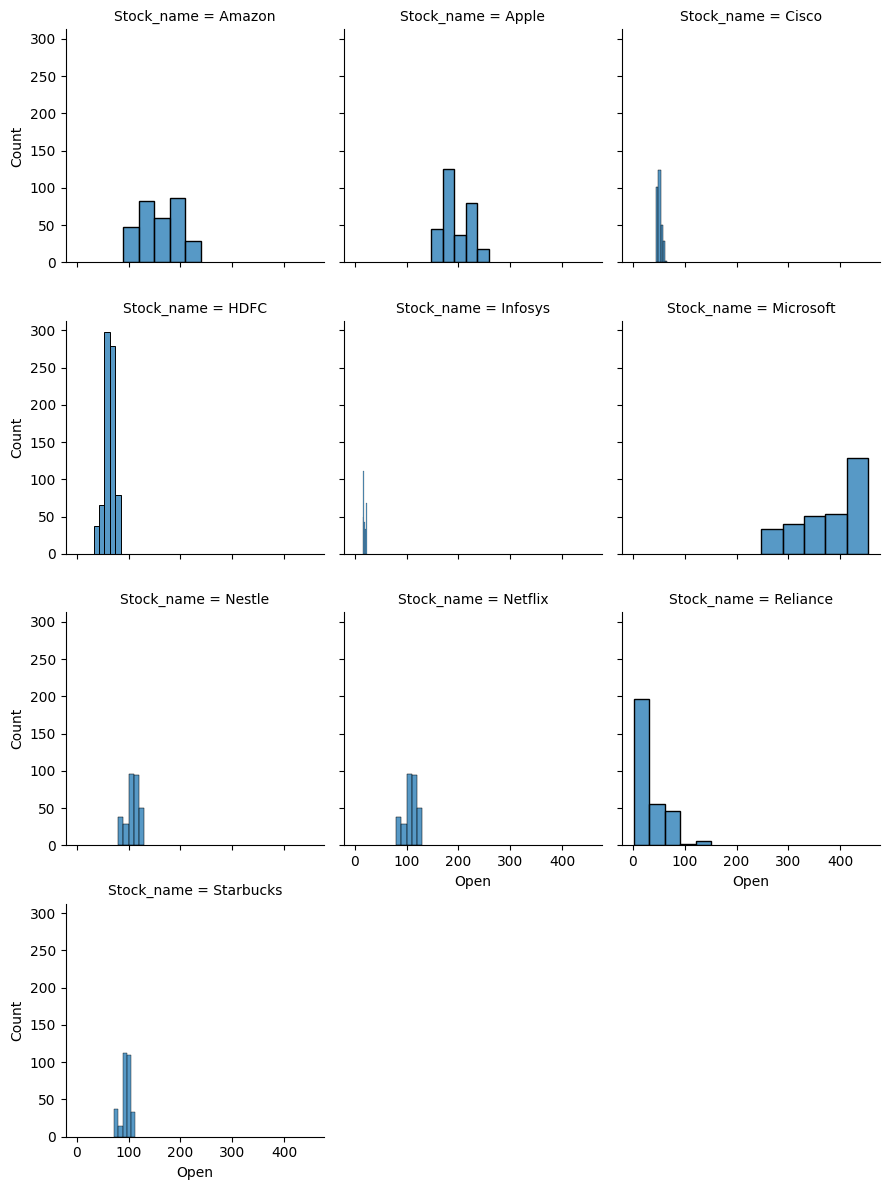

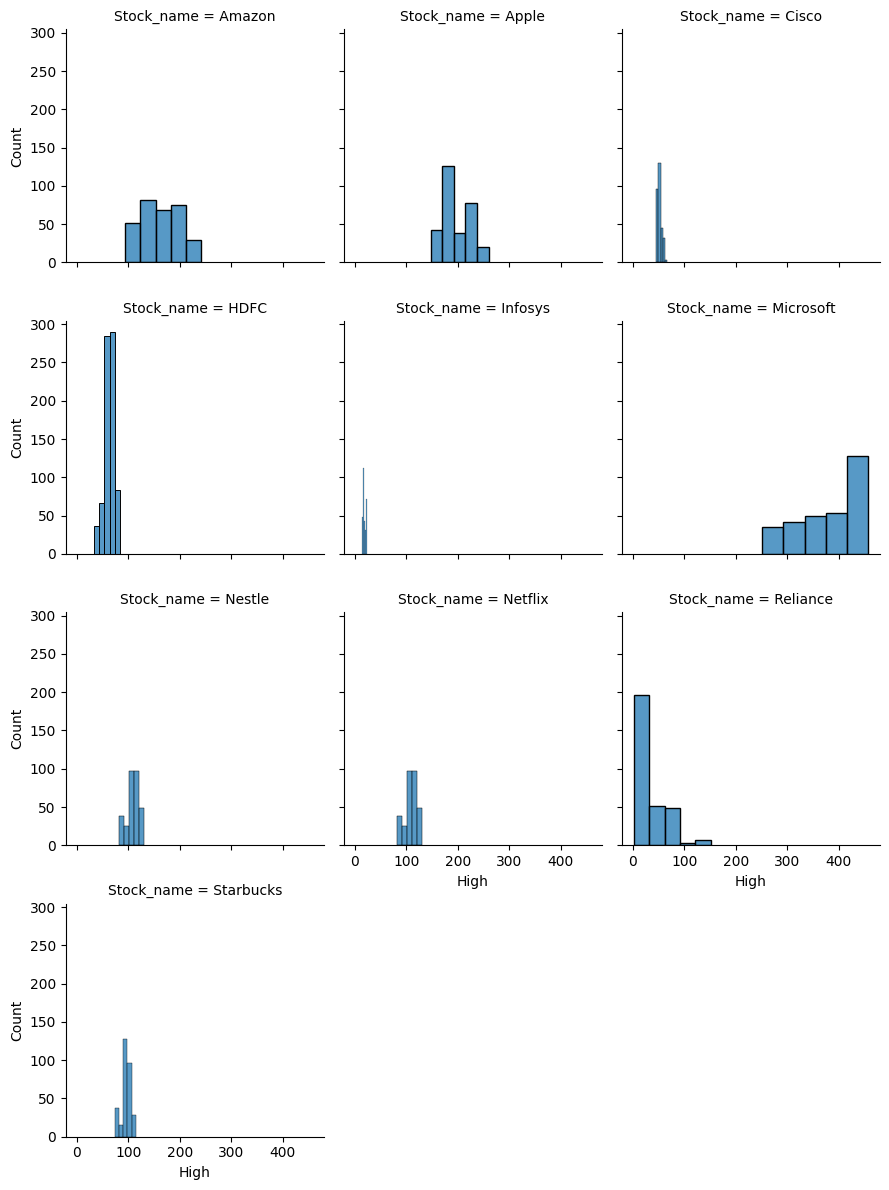

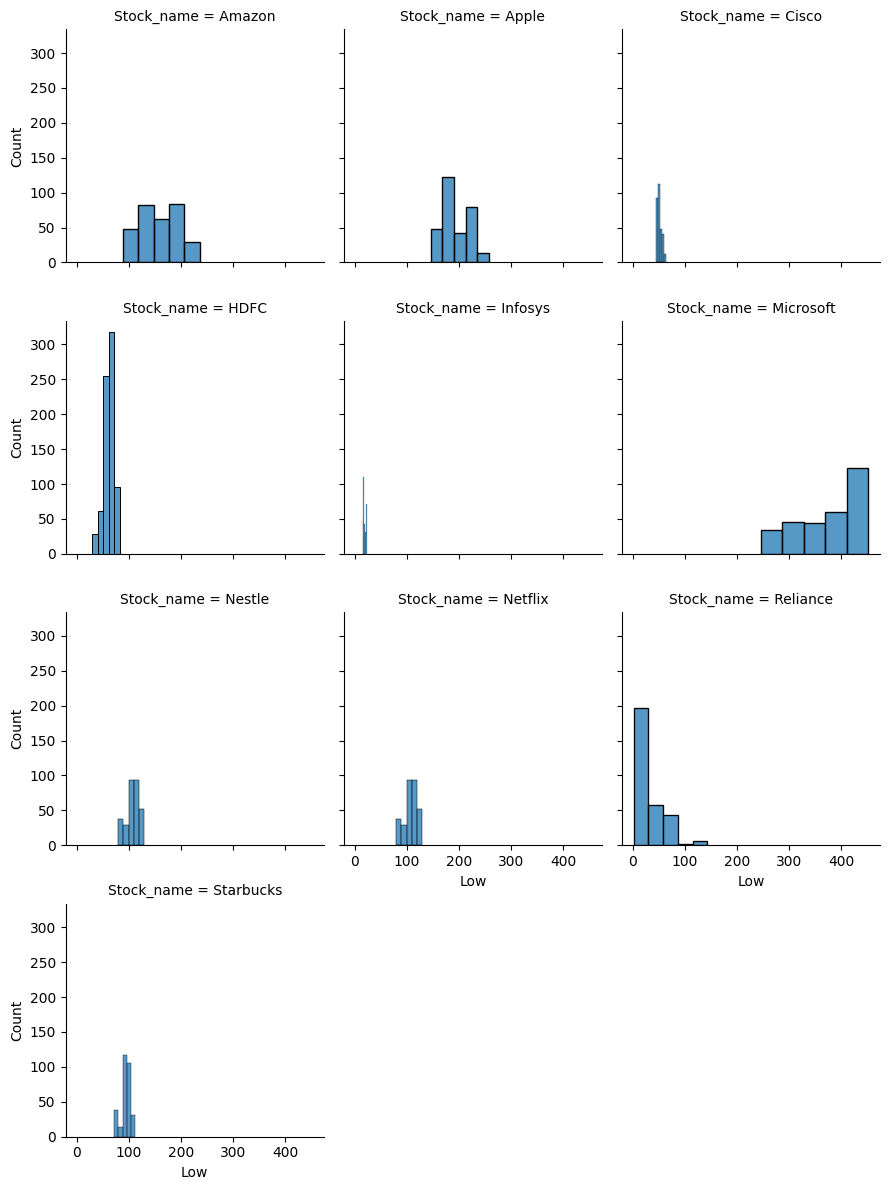

In [13]:
for i in ['Close/Last', 'Volume','Open','High', 'Low']:
    g = sns.FacetGrid(all_data, col="Stock_name", col_wrap=3)
    g.map_dataframe(sns.histplot, x=i, bins=5)
    plt.show()

In [14]:
# Get mean returns of all stocks
mean_returns = all_data['Returns'].mean()

mean_returns

np.float64(0.0008360627293771972)

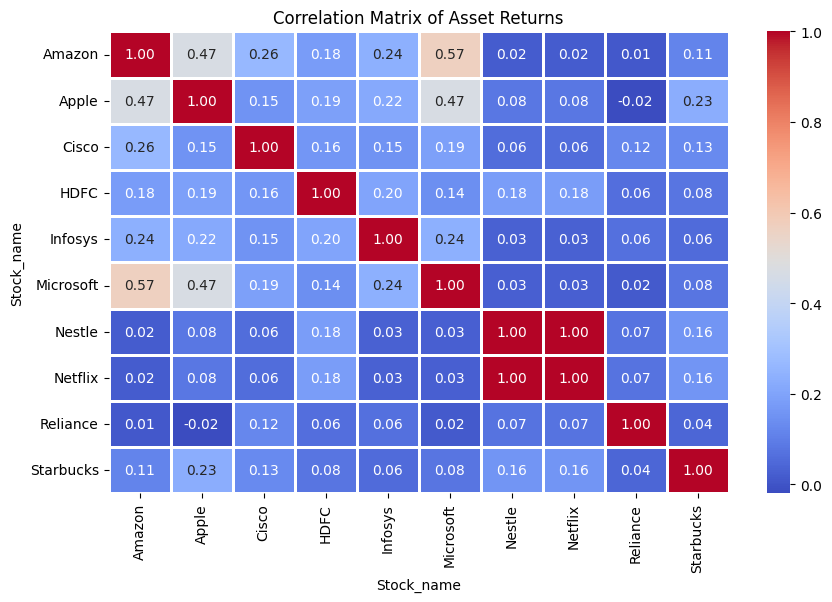

In [15]:
# Create a pivot table for correlation calculation
returns_pivot = all_data.pivot_table(index="Date", columns="Stock_name", values="Returns")

# Compute correlation matrix
correlation_matrix = returns_pivot.corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=1)
plt.title("Correlation Matrix of Asset Returns")
plt.show()


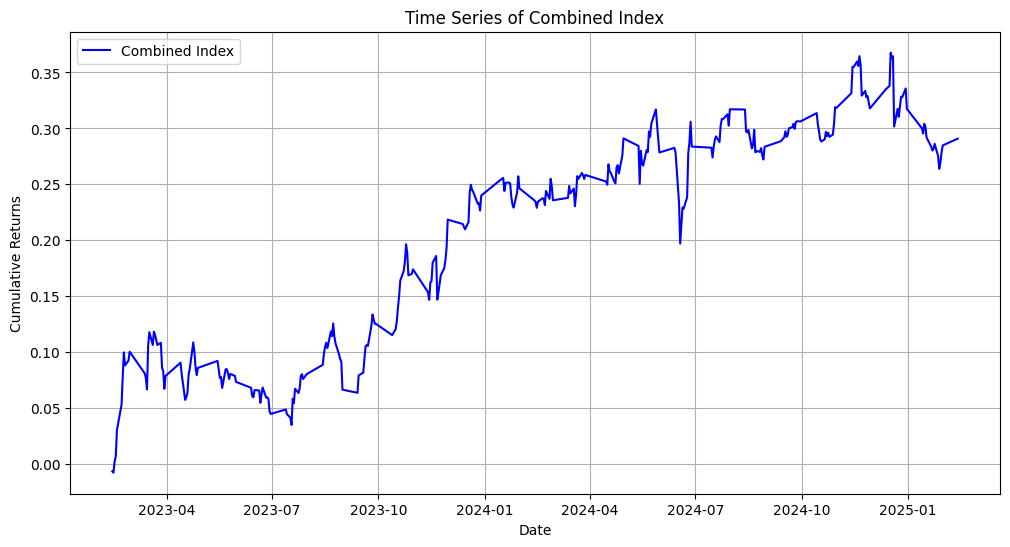

In [16]:
# Define equal weights (assuming 10 assets, so each gets 10%)
num_assets = 10
weights = [1/num_assets] * num_assets

# Compute portfolio return
portfolio_returns = returns_pivot.dot(weights)

# Convert to DataFrame
portfolio_df = pd.DataFrame({"Date": returns_pivot.index, "Portfolio Return": portfolio_returns})

# Plot the time series of the portfolio index
plt.figure(figsize=(12, 6))
plt.plot(portfolio_df["Date"], portfolio_df["Portfolio Return"].cumsum(), label="Combined Index", color="blue")
plt.xlabel("Date")
plt.ylabel("Cumulative Returns")
plt.title("Time Series of Combined Index")
plt.legend()
plt.grid()
plt.show()

In [17]:
# Compute portfolio return
mean_returns = returns_pivot.mean()
cov_matrix = returns_pivot.cov()

# Number of assets
num_assets = len(mean_returns)

Optimal Portfolio Return: 0.0098, Optimal Risk: 0.0952


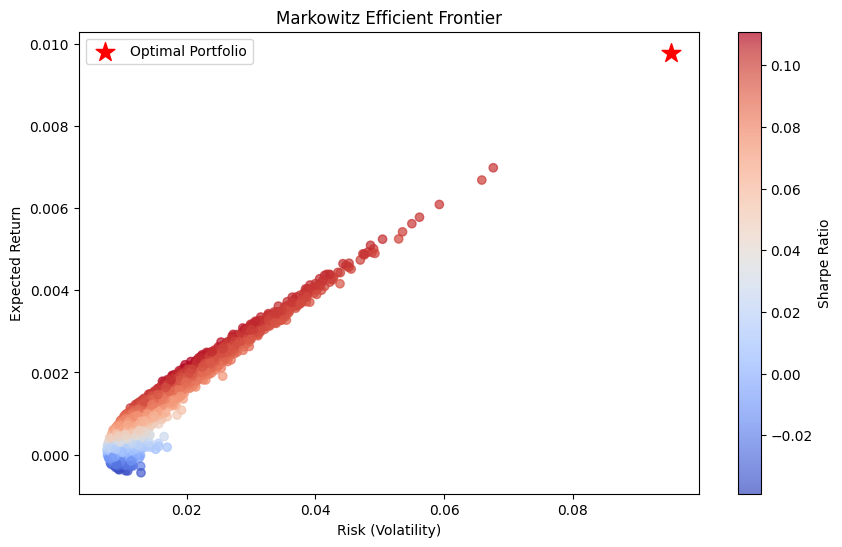

In [18]:
# Equal initial weights
weights = np.array([1/num_assets] * num_assets)

# Function to calculate portfolio return and volatility
def portfolio_performance(weights, mean_returns, cov_matrix):
    port_return = np.dot(weights, mean_returns)
    port_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    return port_return, port_volatility

# Function to maximize Sharpe Ratio (Efficient Frontier)
def negative_sharpe_ratio(weights, mean_returns, cov_matrix, risk_free_rate=0.02):
    port_return, port_volatility = portfolio_performance(weights, mean_returns, cov_matrix)
    return - (port_return - risk_free_rate) / port_volatility

# Constraints: sum of weights = 1
constraints = ({'type': 'eq', 'fun': lambda w: np.sum(w) - 1})
bounds = tuple((0, 1) for _ in range(num_assets))

# Optimize for maximum Sharpe Ratio
result = minimize(negative_sharpe_ratio, weights, args=(mean_returns, cov_matrix), method='SLSQP', bounds=bounds, constraints=constraints)
optimal_weights = result.x

# Compute optimal portfolio return and risk
optimal_return, optimal_volatility = portfolio_performance(optimal_weights, mean_returns, cov_matrix)
print(f"Optimal Portfolio Return: {optimal_return:.4f}, Optimal Risk: {optimal_volatility:.4f}")

# Plot Efficient Frontier
portfolios = []
for _ in range(5000):
    random_weights = np.random.dirichlet(np.ones(num_assets), size=1)[0]
    ret, vol = portfolio_performance(random_weights, mean_returns, cov_matrix)
    portfolios.append([vol, ret])

portfolios = np.array(portfolios)

plt.figure(figsize=(10,6))
plt.scatter(portfolios[:,0], portfolios[:,1], c=portfolios[:,1]/portfolios[:,0], cmap='coolwarm', alpha=0.7)
plt.xlabel('Risk (Volatility)')
plt.ylabel('Expected Return')
plt.colorbar(label='Sharpe Ratio')
plt.title('Markowitz Efficient Frontier')

# Plot Optimal Portfolio
plt.scatter(optimal_volatility, optimal_return, color='red', marker='*', s=200, label="Optimal Portfolio")
plt.legend()
plt.show()

In [19]:
# Compute weighted portfolio return & volatility
combined_return = np.dot(weights, mean_returns)
combined_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))

print(f"Combined Index Return: {combined_return:.4f}")
print(f"Combined Index Risk: {combined_volatility:.4f}")

Combined Index Return: 0.0010
Combined Index Risk: 0.0124
